In [1]:
import numpy as np
import dxchange
import holotomo
import matplotlib.pyplot as plt
import cupy as cp
import scipy.ndimage as ndimage
import numpy as np
import sys
import tomoalign
from matplotlib_scalebar.scalebar import ScaleBar
%matplotlib inline
PLANCK_CONSTANT = 4.135667696e-18  # [keV*s]
SPEED_OF_LIGHT = 299792458  # [m/s]


512_360_33.35_2.0e-02_1.0e-06_False_True_2_5_1.00e-06_6.00e-01
/data/vnikitin/modeling/3d_ald_syn_codes512_360_33.35_2.0e-02_1.0e-06_False_True_2_5_1.00e-06_6.00e-01/ure/o00320.tiff
['', 'data', 'vnikitin', 'modeling', '3d_ald_syn_codes512_360_33.35_2.0e-02_1.0e-06_False_True_2_5_1.00e-06_6.00e-01', 'ure', 'o00320.tiff']


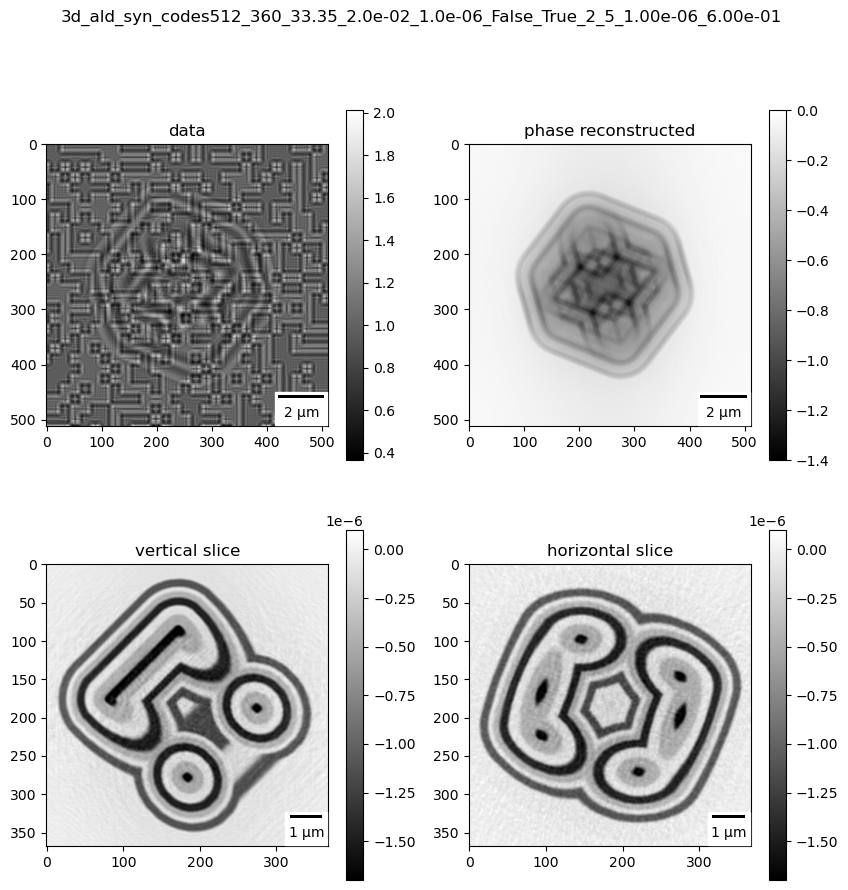

In [39]:
energy = 33.35  # [keV] xray energy
z1p = 20e-3# positions of the probe and code for reconstruction
# z1p = 270e-3# positions of the probe and code for reconstruction
ill_feature_size = 1e-6
code_thickness = 1e-6
use_prb = False
use_code = True
ndist = 3
smooth = 5
niter = 2049
step = 32
vc = 0.6
flg_show = True
###################

pad=False
ne=512
n = 512  # object size in each dimension
ntheta = 360  # number of angles (rotations)
pn = 512  # tomography chunk size for GPU processing
ptheta = 360  # holography chunk size for GPU processing
center = n/2  # rotation axis
theta = np.linspace(0, np.pi, ntheta).astype('float32')  # projection angles

flg = f'{n}_{ntheta}_{energy:.2f}_{z1p:.1e}_{ill_feature_size:.1e}_{use_prb}_{use_code}_{ndist}_{smooth}_{code_thickness:.2e}_{vc:.2e}'
print(flg)

wavelength = PLANCK_CONSTANT * SPEED_OF_LIGHT / energy
focusToDetectorDistance = 1.28
sx0 = 3.7e-4
z1 = np.array([4.584e-3, 4.765e-3, 5.488e-3, 6.9895e-3])[:ndist]-sx0
z1[:] = z1[0]

z2 = focusToDetectorDistance-z1
distances = (z1*z2)/focusToDetectorDistance
magnifications = focusToDetectorDistance/z1
norm_magnifications = magnifications/magnifications[0]
# scaled propagation distances due to magnified probes
distances = distances*norm_magnifications**2

voxelsize = vc*3e-6/magnifications[0]*2048/n  # object voxel size
m=512-64-128
name = f'/data/vnikitin/modeling/3d_ald_syn_codes{flg}/ure/o{m:05}.tiff'
data = dxchange.read_tiff(f'/data/vnikitin/modeling/3d_ald_syn_codes{flg}/ure/r{m:05}.tiff')
print(name)
print(name.split('/'))

vvmin= -1.7e-6
vvmax=1e-7
# vvmin= -2.2e-6
# vvmax=1e-7
fig, ax = plt.subplots(2,2, figsize=(10, 10))
fig.suptitle(name.split('/')[4],fontsize=12)
im = ax[1,0].imshow(data[32*n//256:-40*n//256,195*n//256,83*n//256:-117*n//256],cmap='gray',vmin=vvmin,vmax=vvmax)
# im = ax[0].imshow(data[32+60:32+120,195,83+20:83+80],cmap='gray',vmin=vvmin,vmax=vvmax)
plt.colorbar(im)
ax[1,0].add_artist(ScaleBar(voxelsize,location='lower right'))
im = ax[1,1].imshow(data[128*n//256,90*n//256:-110*n//256,85*n//256:-115*n//256],cmap='gray',vmin=vvmin,vmax=vvmax)
# im = ax[1].imshow(data[128,90:-110,85:-115],cmap='gray',vmin=vvmin,vmax=vvmax)
ax[1,1].add_artist(ScaleBar(voxelsize,location='lower right'))

plt.colorbar(im)

data = dxchange.read_tiff(f'/data/vnikitin/modeling/3d_ald_syn_codes{flg}/psi/r{m:05}.tiff')
im = ax[0,1].imshow(data[40*n//256],cmap='gray',vmin=-1.4,vmax=0)
ax[0,1].add_artist(ScaleBar(voxelsize,location='lower right'))
plt.colorbar(im)

data = dxchange.read_tiff(f'/data/vnikitin/modeling/data_3d_ald_syn_codes_{flg}_0.tiff')
im = ax[0,0].imshow(data[40*n//256],cmap='gray')#,vmin=-1.4,vmax=0)
ax[0,0].add_artist(ScaleBar(voxelsize,location='lower right'))
plt.colorbar(im)
str = name.split('/')[4]
ax[0,0].set_title('data')
ax[0,1].set_title('phase reconstructed')
ax[1,0].set_title('vertical slice')
ax[1,1].set_title('horizontal slice')

plt.savefig(f'figs/{str}.png',dpi=300,bbox_inches='tight')




['', 'data', 'vnikitin', 'modeling', '3d_ald_syn_codes256_180_33.35_2.0e-02_1.0e-06_False_True_1_5_2.00e-06_7.00e-01', 'ure', 'o01024.tiff']


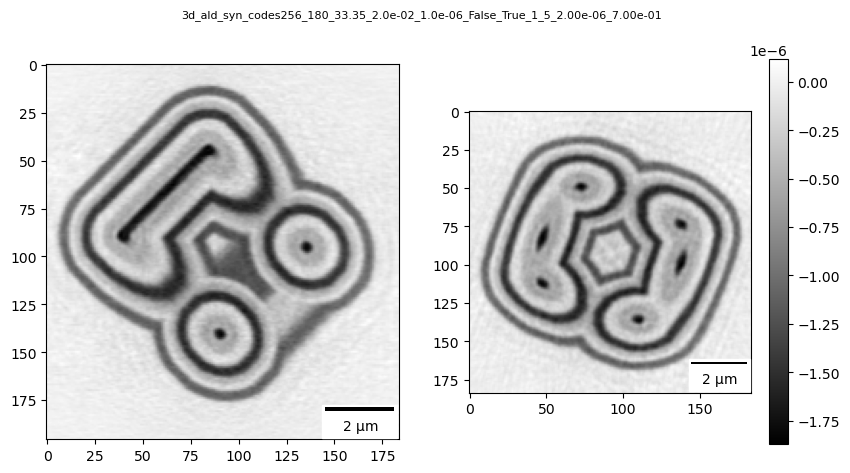

In [5]:

iter = 144
for st in range(0,1500//250):
    data[st:1500:1500//250] = dxchange.read_tiff(f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{250}_{ndist}_{st}/r{iter:05}noprobe.tiff')[:,800:800+nz,ne//2-n//2+shiftc:ne//2+n//2+shiftc]


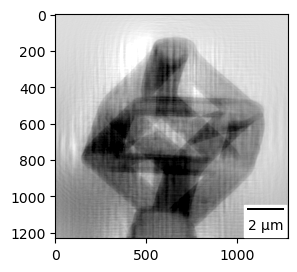

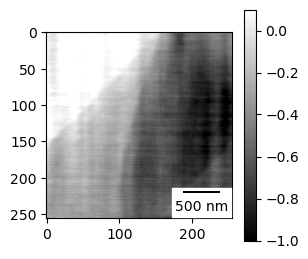

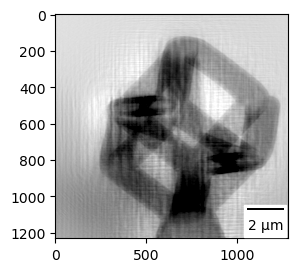

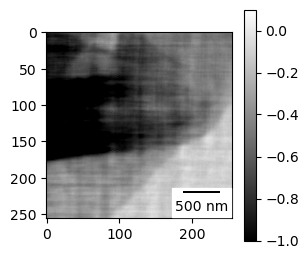

In [6]:

voxelsize=1e-8
vvmin=-1
vvmax=0.1
stx = 500
sty = 200
size = 256

fig, ax = plt.subplots(1, figsize=(3, 3))
plt.imshow(data[0,:,cut:-cut],cmap='gray',vmin=vvmin,vmax=vvmax)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
# plt.colorbar()
plt.savefig(f'figs/recpsi0noprobe.png',dpi=300,bbox_inches='tight')

fig, ax = plt.subplots(1, figsize=(3, 3))
plt.imshow(data[0,sty:sty+size,stx:stx+size],cmap='gray',vmin=vvmin,vmax=vvmax)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
plt.colorbar()
plt.savefig(f'figs/recpsis0noprobe.png',dpi=300,bbox_inches='tight')


fig, ax = plt.subplots(1, figsize=(3, 3))
plt.imshow(data[1050,:,cut:-cut],cmap='gray',vmin=vvmin,vmax=vvmax)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
# plt.colorbar()
plt.savefig(f'figs/recpsi90noprobe.png',dpi=300,bbox_inches='tight')
stx = 1050
sty = 700
size = 256
fig, ax = plt.subplots(1, figsize=(3, 3))
plt.imshow(data[1050,sty:sty+size,stx:stx+size],cmap='gray',vmin=vvmin,vmax=vvmax)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
plt.colorbar()
plt.savefig(f'figs/recpsis90noprobe.png',dpi=300,bbox_inches='tight')

In [7]:
c = 0.001157390898890103
rec = dxchange.read_tiff(f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{ntheta}_{ndist}/cgfinal/r_{400:04}.tiff')[64:-64,256:-128,256:-128]*c

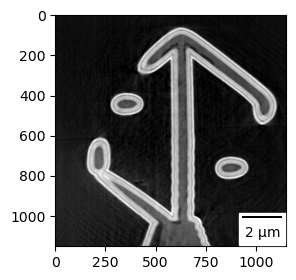

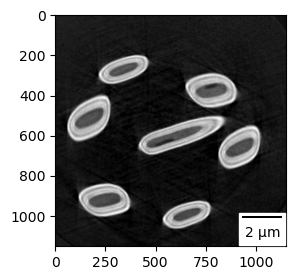

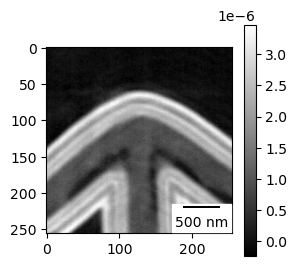

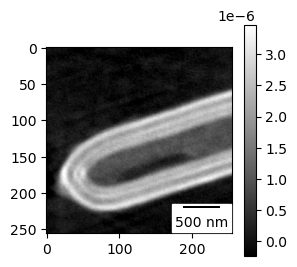

In [8]:

voxelsize=1e-8
vvmin=-2e-4*c
vvmax=3e-3*c
fig, ax = plt.subplots(1, figsize=(3, 3))
plt.imshow(-rec[:,:,750-256],cmap='gray',vmin=vvmin,vmax=vvmax)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
# plt.colorbar()
plt.savefig(f'figs/recv.png',dpi=300,bbox_inches='tight')

fig, ax = plt.subplots(1, figsize=(3, 3))
plt.imshow(-rec[650-64,:],cmap='gray',vmin=vvmin,vmax=vvmax)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
# plt.colorbar()
plt.savefig(f'figs/rech.png',dpi=300,bbox_inches='tight')

stx = 500
sty = 0
size = 256
fig, ax = plt.subplots(1, figsize=(3, 3))
plt.imshow(-rec[:,:,750-256][sty:sty+size,stx:stx+size],cmap='gray',vmin=vvmin,vmax=vvmax)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
plt.colorbar()
plt.savefig(f'figs/recvs.png',dpi=300,bbox_inches='tight')



stx = 400
sty = 470
size = 256
fig, ax = plt.subplots(1, figsize=(3, 3))
plt.imshow(-rec[650-64,:][sty:sty+size,stx:stx+size],cmap='gray',vmin=vvmin,vmax=vvmax)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
plt.colorbar()
plt.savefig(f'figs/rechs.png',dpi=300,bbox_inches='tight')




In [9]:
rec = dxchange.read_tiff(f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{ntheta}_{ndist}/cgfinalnoprobe/r_{400:04}.tiff')[64:-64,256:-128,256:-128]*c

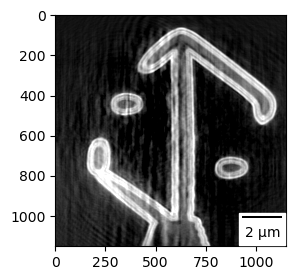

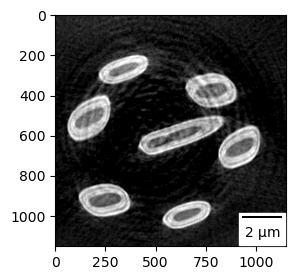

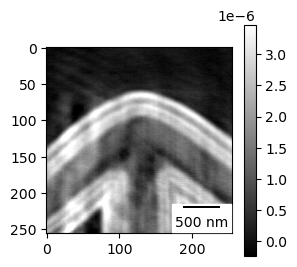

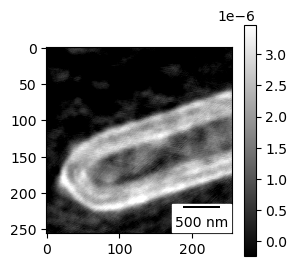

In [10]:
voxelsize=1e-8
vvmin=-2e-4*c
vvmax=3e-3*c
fig, ax = plt.subplots(1, figsize=(3, 3))
plt.imshow(-rec[:,:,750-256],cmap='gray',vmin=vvmin,vmax=vvmax)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
# plt.colorbar()
plt.savefig(f'figs/recvnoprobe.png',dpi=300,bbox_inches='tight')

fig, ax = plt.subplots(1, figsize=(3, 3))
plt.imshow(-rec[650-64,:],cmap='gray',vmin=vvmin,vmax=vvmax)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
# plt.colorbar()
plt.savefig(f'figs/rechnoprobe.png',dpi=300,bbox_inches='tight')

stx = 500
sty = 0
size = 256
fig, ax = plt.subplots(1, figsize=(3, 3))
plt.imshow(-rec[:,:,750-256][sty:sty+size,stx:stx+size],cmap='gray',vmin=vvmin,vmax=vvmax)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
plt.colorbar()
plt.savefig(f'figs/recvsnoprobe.png',dpi=300,bbox_inches='tight')



stx = 400
sty = 470
size = 256
fig, ax = plt.subplots(1, figsize=(3, 3))
plt.imshow(-rec[650-64,:][sty:sty+size,stx:stx+size],cmap='gray',vmin=vvmin,vmax=vvmax)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
plt.colorbar()
plt.savefig(f'figs/rechsnoprobettt.png',dpi=300,bbox_inches='tight')


/data/vnikitin/holo/3d_ald/rfinal_probe_True_1536_250_4_0/pang00192.tiff
(1232, 1280)
/data/vnikitin/holo/3d_ald/rfinal_probe_True_1536_250_4_0/pang00192.tiff


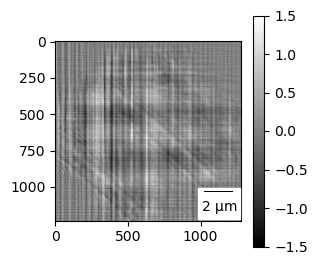

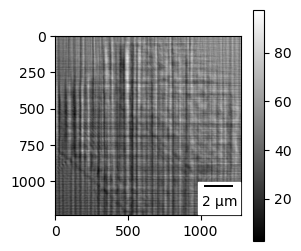

In [29]:
iter = 192
st = 0
nz=1232
print(f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{250}_{ndist}_{st}/pang{iter:05}.tiff')
prb = dxchange.read_tiff(f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{250}_{ndist}_{st}/pang{iter:05}.tiff')[-(ne//2-n//2)+800:-(ne//2-n//2)+800+nz,cut:-cut]#,ne//2-n//2+shiftc:ne//2+n//2+shiftc]
print(prb.shape)

fig, ax = plt.subplots(1, figsize=(3, 3))
plt.imshow(prb,cmap='gray',vmin=-1.5,vmax=1.5)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
plt.colorbar()
plt.savefig(f'figs/prbang.png',dpi=300,bbox_inches='tight')


iter = 192
st = 0
print(f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{250}_{ndist}_{st}/pang{iter:05}.tiff')
prb = dxchange.read_tiff(f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{250}_{ndist}_{st}/pabs{iter:05}.tiff')[-(ne//2-n//2)+800:-(ne//2-n//2)+800+nz,cut:-cut]#,ne//2-n//2+shiftc:ne//2+n//2+shiftc]


fig, ax = plt.subplots(1, figsize=(3, 3))
plt.imshow(prb,cmap='gray')
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
plt.colorbar()
plt.savefig(f'figs/prbabs.png',dpi=300,bbox_inches='tight')

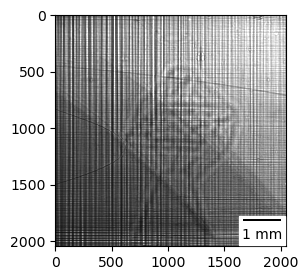

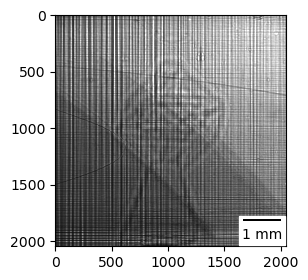

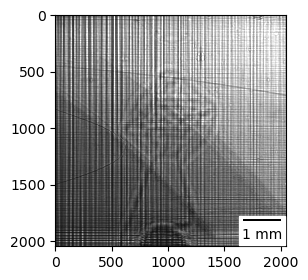

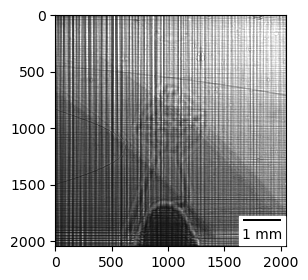

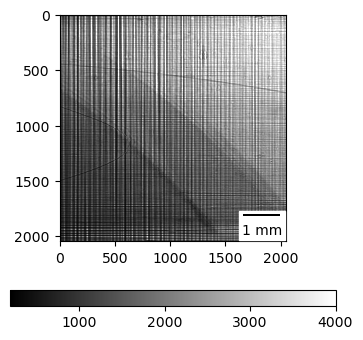

In [30]:
# ID16a setup
detector_pixelsize = 3e-6
energy = 17.05 #[keV] xray energy
focusToDetectorDistance = 1.208 # [m]
sx0 = -2.493e-3
z1 = np.array([1.5335e-3,1.7065e-3,2.3975e-3,3.8320e-3])[:ndist]-sx0
z2 = focusToDetectorDistance-z1
distances = (z1*z2)/focusToDetectorDistance
magnifications = focusToDetectorDistance/z1

for k in range(4):
    fname = f'/data/viktor/id16a/3d_ald4/3d_ald4_ht_10nm_{k+1}_/3d_ald4_ht_10nm_{k+1}_{0:04}.edf'
    tmp = dxchange.read_edf(fname)[0]
    
    fig, ax = plt.subplots(1, figsize=(3, 3))
    plt.imshow(tmp,cmap='gray',vmin=0,vmax=4000)#,vmin=-1.5,vmax=1.5)
    ax.add_artist(ScaleBar(voxelsize*magnifications[0],location='lower right'))
    # plt.colorbar(orientation='horizontal')
    plt.savefig(f'figs/data{k}.png',dpi=300,bbox_inches='tight')

fname = f'/data/viktor/id16a/3d_ald4/3d_ald4_ht_10nm_1_/refHST0000.edf'
tmp = dxchange.read_edf(fname)[0]

fig, ax = plt.subplots(1, figsize=(4.2, 4.2))
plt.imshow(tmp,cmap='gray',vmax=4000)#,vmin=-1.5,vmax=1.5)
ax.add_artist(ScaleBar(voxelsize*magnifications[0],location='lower right'))
plt.colorbar(orientation='horizontal')
plt.savefig(f'figs/ref.png',dpi=300,bbox_inches='tight')
